<h1>This is an exploration of the results of the CO calibration<h1>

In [19]:
import csv
import json
import pandas as pd
import os
from datetime import datetime
from pytz import timezone
import matplotlib.pyplot as plt
import datetime
import urllib
import numpy as np
import plotly.graph_objects as go

import sys
sys.path.append("co/") 
from viz_utils import *

<h3>Vizualizing the uncorrected data that was initially fetched<h3>

In [20]:
uncorrected_df = pd.read_csv("uncorrected_co.csv")

print(uncorrected_df)
print(uncorrected_df["co_wrk_aux"].describe())


       Unnamed: 0  co_wrk_aux       temp  Node ID            timestamp
0               0    0.080260  20.315713      250  2022-09-01 03:00:00
1               1    0.069783  20.451469      250  2022-09-01 04:00:00
2               2    0.082974  19.518393      250  2022-09-01 05:00:00
3               3    0.131306  19.406088      250  2022-09-01 06:00:00
4               4    0.082328  23.132333      250  2022-09-01 07:00:00
...           ...         ...        ...      ...                  ...
54029         445    0.122907   6.357794      269  2023-02-28 23:00:00
54030         446    0.149630   5.778958      269  2023-03-01 00:00:00
54031         447    0.142424   5.317437      269  2023-03-01 01:00:00
54032         448    0.136203   4.999011      269  2023-03-01 02:00:00
54033         449    0.170389   4.882617      269  2023-03-01 03:00:00

[54034 rows x 5 columns]
count    54034.000000
mean         0.112202
std          0.095216
min          0.000033
25%          0.062948
50%         

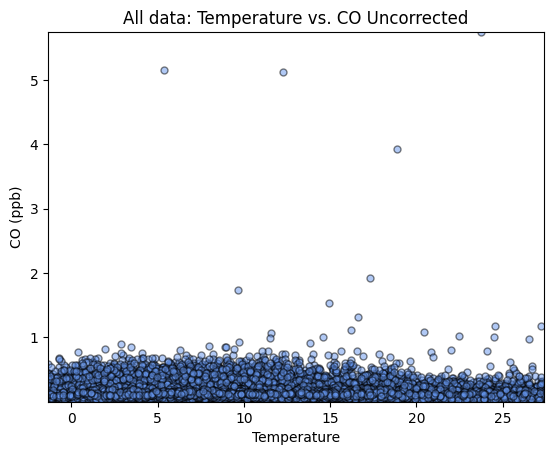

In [22]:
# just vizualize the data pre calibration 

make_scatter_plot(uncorrected_df,'All data')


<h3>Vizualizing the results of the correction<h3>

In [4]:
# load data from a CSV file
df = pd.read_csv('corrected_co.csv')
print("CO Summary")
print(df["CO_ppb"].describe())
print(" ")
print("Temperature Summary")
print(df["temp"].describe())

#size of the data
print(df.size)

CO Summary
count    52299.000000
mean         0.267512
std          0.174913
min          0.011554
25%          0.175630
50%          0.217327
75%          0.291948
max         12.189533
Name: CO_ppb, dtype: float64
 
Temperature Summary
count    52299.000000
mean         9.962537
std         16.145683
min       -999.000000
25%          4.228399
50%          9.184299
75%         15.739113
max         29.992558
Name: temp, dtype: float64
575289


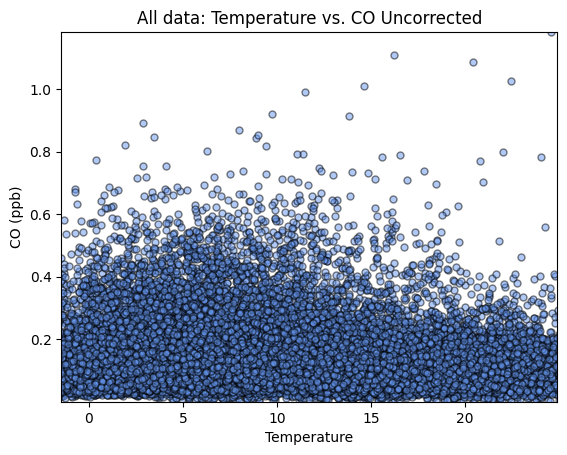

In [6]:

make_scatter_plot(df,'All data')



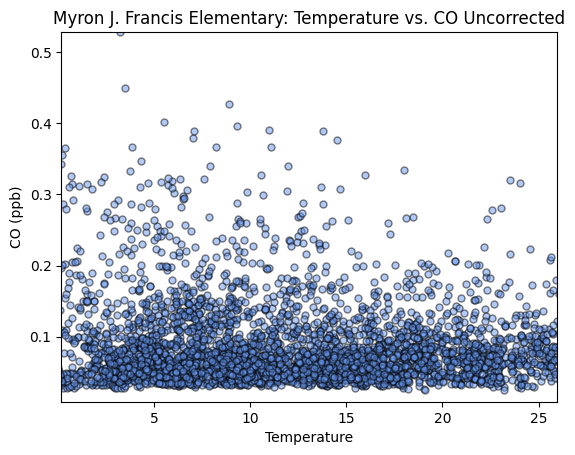

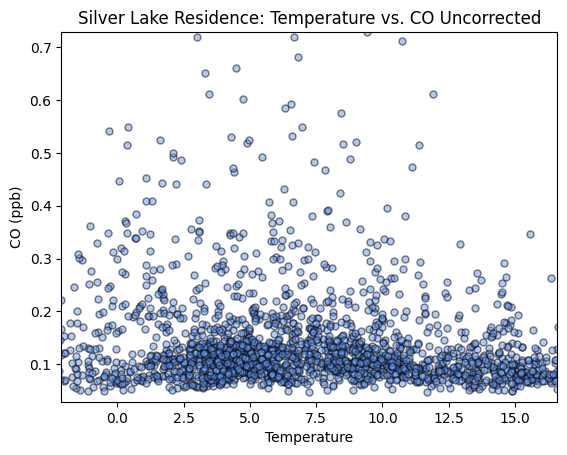

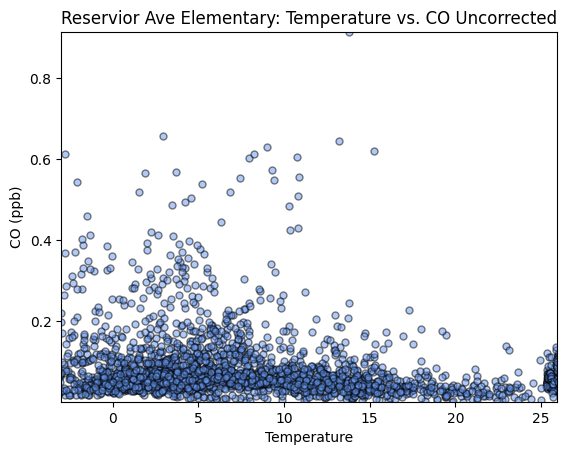

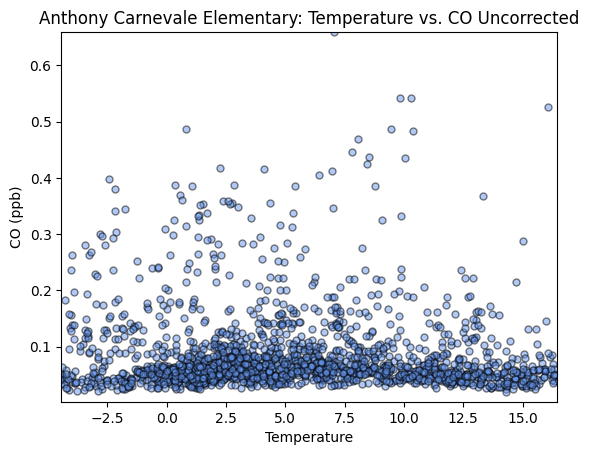

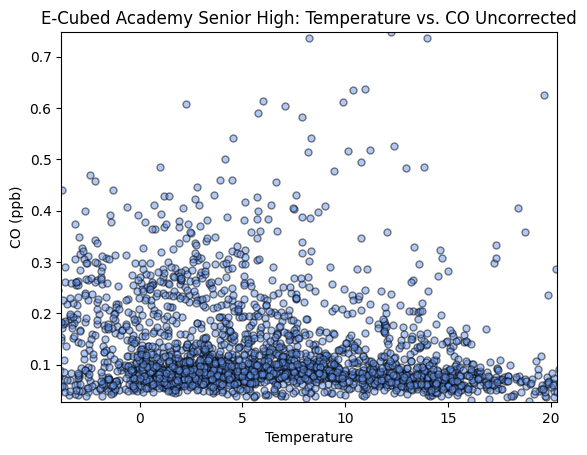

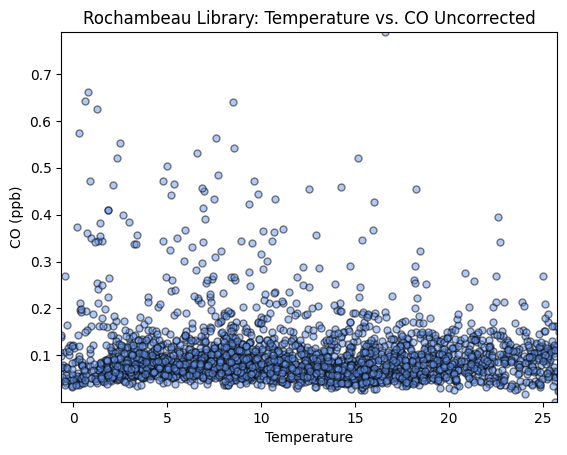

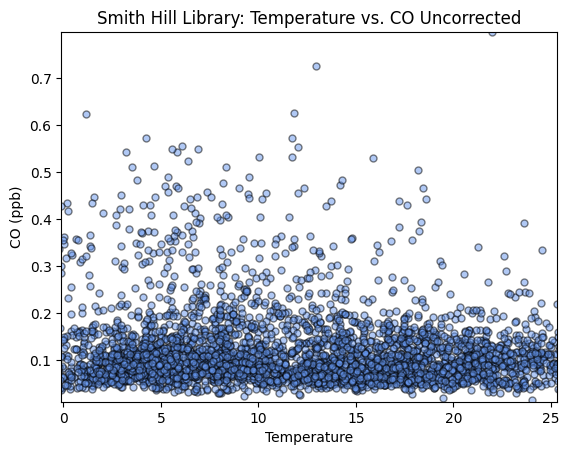

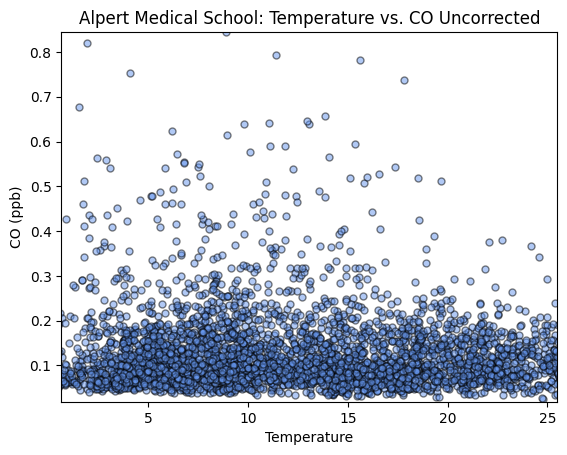

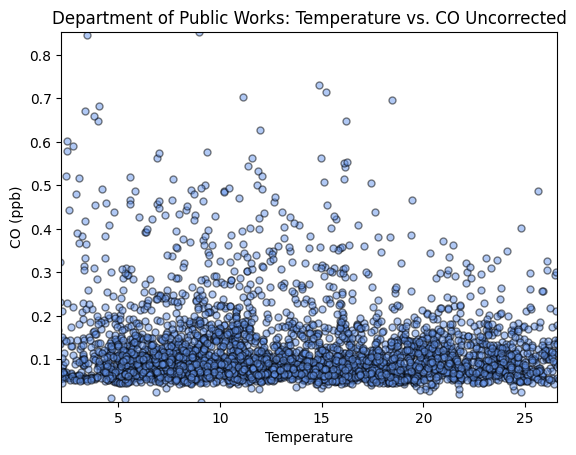

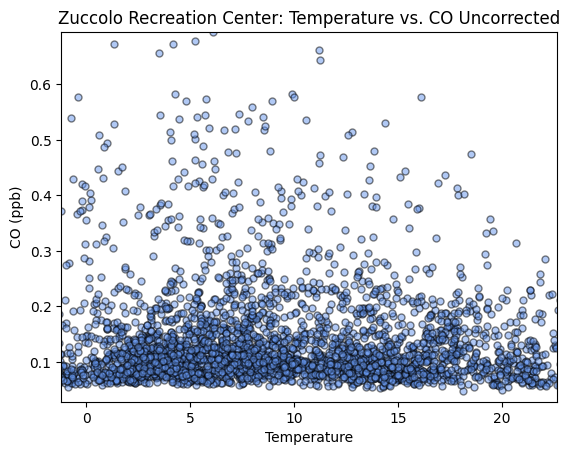

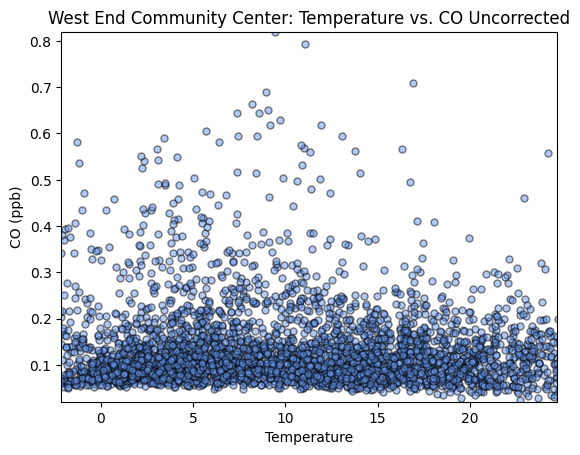

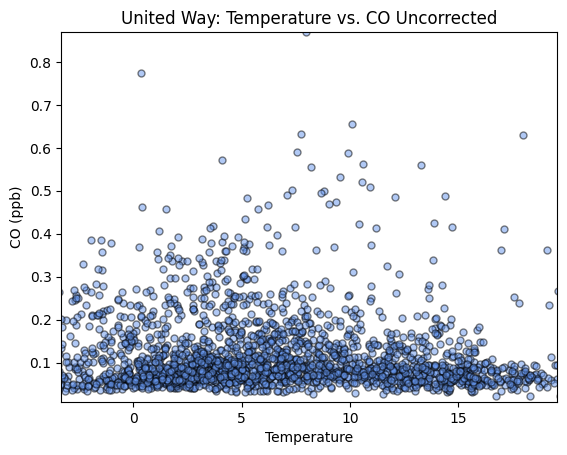

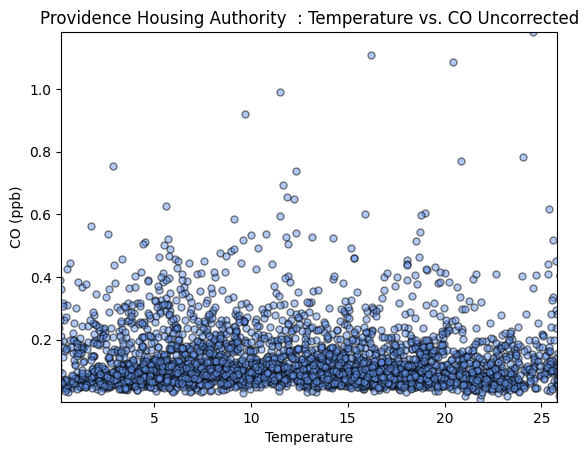

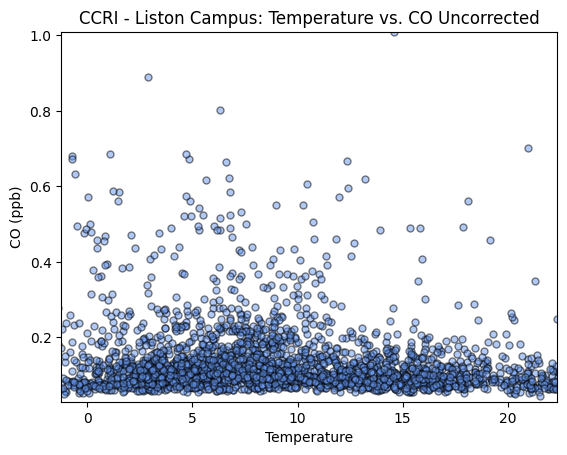

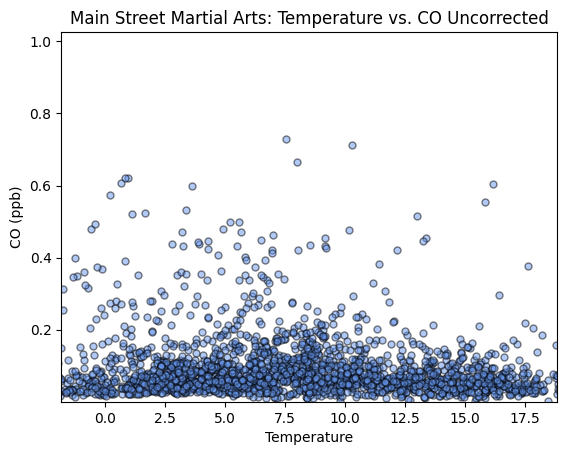

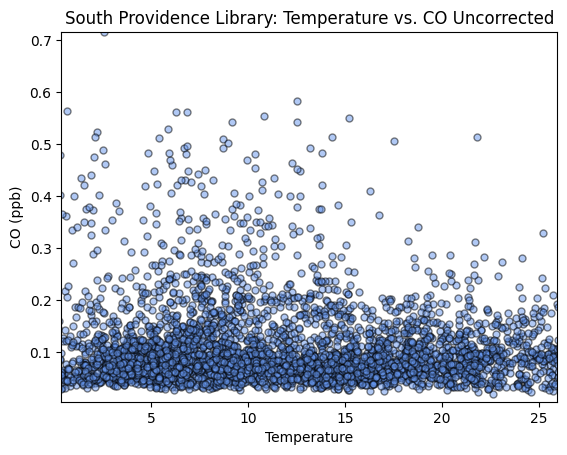

IndexError: single positional indexer is out-of-bounds

In [9]:
#display the plots for each of the nodes

node_list = pd.read_csv("lookup_tables/co_lookup_with_sensors.csv")
node_list = node_list.dropna(subset=['Node ID'])
node_list["Node ID"] = node_list["Node ID"].apply(lambda x: int(str(x)[0:3]))
node_list = list(node_list["Node ID"])

df_nodes = list(df["Node ID"])

for node in node_list:
    # filter df to only include the current node
    node_df = df[df["Node ID"] == node]

    name = str(node_df["Location"].iloc[0])
    make_scatter_plot(node_df,name)
    

[0.0, 0.1, 0.2, 0.5, 0.7, 1.0, 1.5, 2.0, 2.5, 3.0]


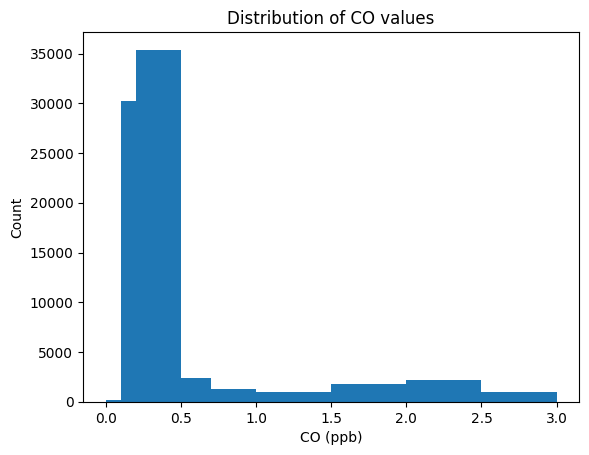

Number of values less than 0.1: 232
Number of values more than 3.0: 136
Mean: 0.3907347394002916
Mean for node 250: 2.113533403108563
Mean for node 254: 0.2809805649677109
Mean for node 258: 0.24807649646394314
Mean for node 261: 0.23421794555257294
Mean for node 264: 0.2824765843945273
Mean for node 267: 0.2319855634915203
Mean for node 270: 0.24823700859505698
Mean for node 274: 0.2605254750543993
Mean for node 276: 0.23268318359253587
Mean for node 251: 0.3140496327075156
Mean for node 252: 0.2522675711310329
Mean for node 255: 0.26019154866449157
Mean for node 257: 0.2733850488521014
Mean for node 259: 0.24067568086708596
Mean for node 262: 0.24640658088032483
Mean for node 263: 0.2515834713105648
Mean for node 266: 0.18707151285989299
Mean for node 269: 0.20861271700001321
Mean for node 268: 0.22988379020170552


In [13]:
# plot the range of values for CO

# create a histogram
bin_edges = [0.0,0.1,0.2,0.5,0.7,1.0,1.5,2.0,2.5,3.0]
print(bin_edges)

# create the histogram using matplotlib
plt.hist(df['CO_ppb'], bins=bin_edges)

# add labels and title
plt.xlabel('CO (ppb)')
plt.ylabel('Count')
plt.title('Distribution of CO values')

# display the plot
plt.show()

# Count the amount of values that are less thatn 0.1
print("Number of values less than 0.1: " + str(len(df[df["CO_ppb"] < 0.1])))
print("Number of values more than 3.0: " + str(len(df[df["CO_ppb"] > 3.0])))
print("Mean: " + str(df['CO_ppb'].mean()))


# Get the mean for each sensor
for node in node_list:
    # filter df to only include the current node
    node_df = df[df["Node ID"] == node]
    print("Mean for node " + str(node) + ": " + str(node_df['CO_ppb'].mean()))





In [21]:

# Set 'timestamp' column as the index
df.set_index('timestamp', inplace=True)

# Plot the time series
plt.plot(df.index, df['CO_ppb'])
plt.xlabel('Time')
plt.ylabel('CO Levels')
plt.title('CO Levels Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Display the plot
plt.show()

KeyError: "None of ['timestamp'] are in the columns"